In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [4]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
train_df.columns

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_ol

In [6]:
X=train_df[['loan_amnt', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'verification_status', 
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag']]

In [7]:
y=train_df['loan_status']

In [8]:
print("Shape: ", X.shape, y.shape)

Shape:  (12180, 83) (12180,)


## Convert categorical data to numeric and separate target feature for training data


In [9]:
# One-hot encoding the 'workclass' column creates 9 new columns, one for each category
z=pd.get_dummies(X['home_ownership'])
z

,ANY,MORTGAGE,OWN,RENT
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
12175,0,0,0,1
12176,0,0,0,1
12177,0,0,0,1
12178,0,1,0,0


In [10]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,0,1,0,1,1,0,1,0,1,0
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,1,1,0,1,1,0,1,0,1,0
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,0,1,0,1,1,0,1,0,1,0
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,0,1,0,1,0,1,1,0,1,0


## Train the Logistic Regression model on the unscaled data and print the model score

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
classifier = LogisticRegression()
classifier

LogisticRegression()

In [12]:
y_label = LabelEncoder().fit_transform(train_df['loan_status'])
y_label
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)
classifier.fit(X_train, y_train)

/Users/jackiegb/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6522167487684729
Testing Data Score: 0.6472906403940887


In [14]:
# Make predictions

print(f'Actual:\t\t{list(y_test[:20])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:20]))}')

Actual:		[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
Predicted:	[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1]


## Scale the data

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(train_df['loan_status'])
y_label

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
#Use train_test_split to create training and testing data.

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

### END SOLUTION

In [17]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.21011981,  0.43695974, -1.1282885 , ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [-1.327905  ,  1.22463355, -1.24604144, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [-1.21011981,  0.69129297, -1.11688534, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       ...,
       [ 0.16404075,  0.21679067, -0.18042683, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [-0.22857655,  0.69129297,  0.11294836, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [ 0.85112103,  0.85831778,  0.55231125, ..., -0.1694586 ,
         0.01812499, -0.01812499]])

In [18]:
# Alternatively, scaling the data by using MinMaxScaler()
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.1025641 , 0.45217391, 0.08890365, ..., 0.        , 1.        ,
        0.        ],
       [0.07179487, 0.6326087 , 0.06788585, ..., 0.        , 1.        ,
        0.        ],
       [0.1025641 , 0.51043478, 0.09093901, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.46153846, 0.40173913, 0.25808811, ..., 0.        , 1.        ,
        0.        ],
       [0.35897436, 0.51043478, 0.31045284, ..., 0.        , 1.        ,
        0.        ],
       [0.64102564, 0.54869565, 0.38887501, ..., 0.        , 1.        ,
        0.        ]])

In [19]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.48717949, 0.60869565, 0.30407864, ..., 0.        , 1.        ,
        0.        ],
       [0.61538462, 0.44      , 0.3526286 , ..., 0.        , 1.        ,
        0.        ],
       [0.69871795, 0.12217391, 0.52709645, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.28205128, 0.99130435, 0.28682685, ..., 0.        , 1.        ,
        0.        ],
       [0.48717949, 0.99130435, 0.490588  , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.51043478, 0.20069592, ..., 0.        , 1.        ,
        0.        ]])

## Train the Logistic Regression model on the scaled data and print the model score

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[1041,  458],
       [ 446, 1100]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1499
           1       0.71      0.71      0.71      1546

    accuracy                           0.70      3045
   macro avg       0.70      0.70      0.70      3045
weighted avg       0.70      0.70      0.70      3045



In [22]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7031198686371101


## Bagging

In [23]:
# Bagging
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

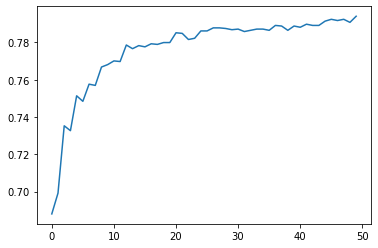

score: 0.7940886699507389


In [42]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.savefig('BaggingScore.png')
plt.show()
print(f'score: {score}')

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7254515599343185


In [26]:
# Make predictions

print(f'Actual:\t\t{list(y_test[:20])}')
print(f'Predicted:\t{list(classifier.predict(X_test_scaled[:20]))}')

Actual:		[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
Predicted:	[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]


## RandomForest-Feature-Selection

In [27]:
# Train a Random Forest Classifier model on the scaled data and print the model score
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_2.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_2.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.780952380952381


[1.67944263e-02 3.62290590e-02 2.87626295e-02 1.50754612e-02
 1.62560644e-02 2.68101964e-03 4.28460178e-03 8.95781718e-03
 1.42236679e-03 1.55823449e-02 1.23012258e-02 2.96181923e-02
 2.95778030e-02 4.34165036e-02 4.37250167e-02 4.97234340e-02
 4.91873437e-02 1.50356351e-02 0.00000000e+00 0.00000000e+00
 9.01302215e-02 8.09025123e-04 0.00000000e+00 1.18647880e-05
 4.48083028e-03 1.36660998e-02 4.43580395e-03 6.71721035e-03
 4.13927651e-03 6.39921020e-03 1.19366843e-02 1.36914472e-02
 1.42844449e-02 4.84409920e-03 7.52562100e-03 1.67478665e-02
 1.31840095e-02 1.56553281e-02 6.62765162e-03 6.81742648e-03
 8.39307756e-03 9.61790287e-03 1.43269807e-02 1.59470428e-02
 1.47720148e-02 1.81586608e-04 1.39950399e-06 1.61324743e-02
 1.68704220e-02 1.19938596e-02 1.04168726e-02 5.99399830e-03
 1.36062318e-02 1.18565711e-02 3.57264290e-03 7.05886305e-03
 7.90738821e-03 7.36418689e-03 9.36022329e-03 1.07472271e-02
 8.66543835e-03 1.05415626e-02 8.00700012e-03 8.88600131e-03
 0.00000000e+00 4.903056

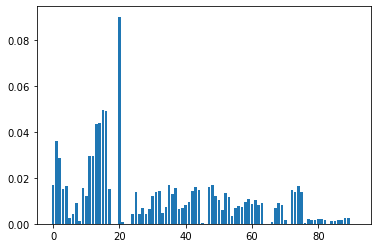

In [28]:
features = clf_2.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [29]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf_2)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [30]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_dummies), y_label, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [31]:
clf_2 = LogisticRegression()
clf_2.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf_2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_2.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7029009304871374
Testing Score: 0.6978653530377669


In [ ]:
#However, fitting to the smaller dataset with the selected features has less noisy parameters to confuse the model. 
#So, we get a more accurate model.

In [32]:
# Make predictions

print(f'Actual:\t\t{list(y_test[:20])}')
print(f'Predicted:\t{list(clf_2.predict(X_selected_test_scaled[:20]))}')

Actual:		[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
Predicted:	[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
